In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

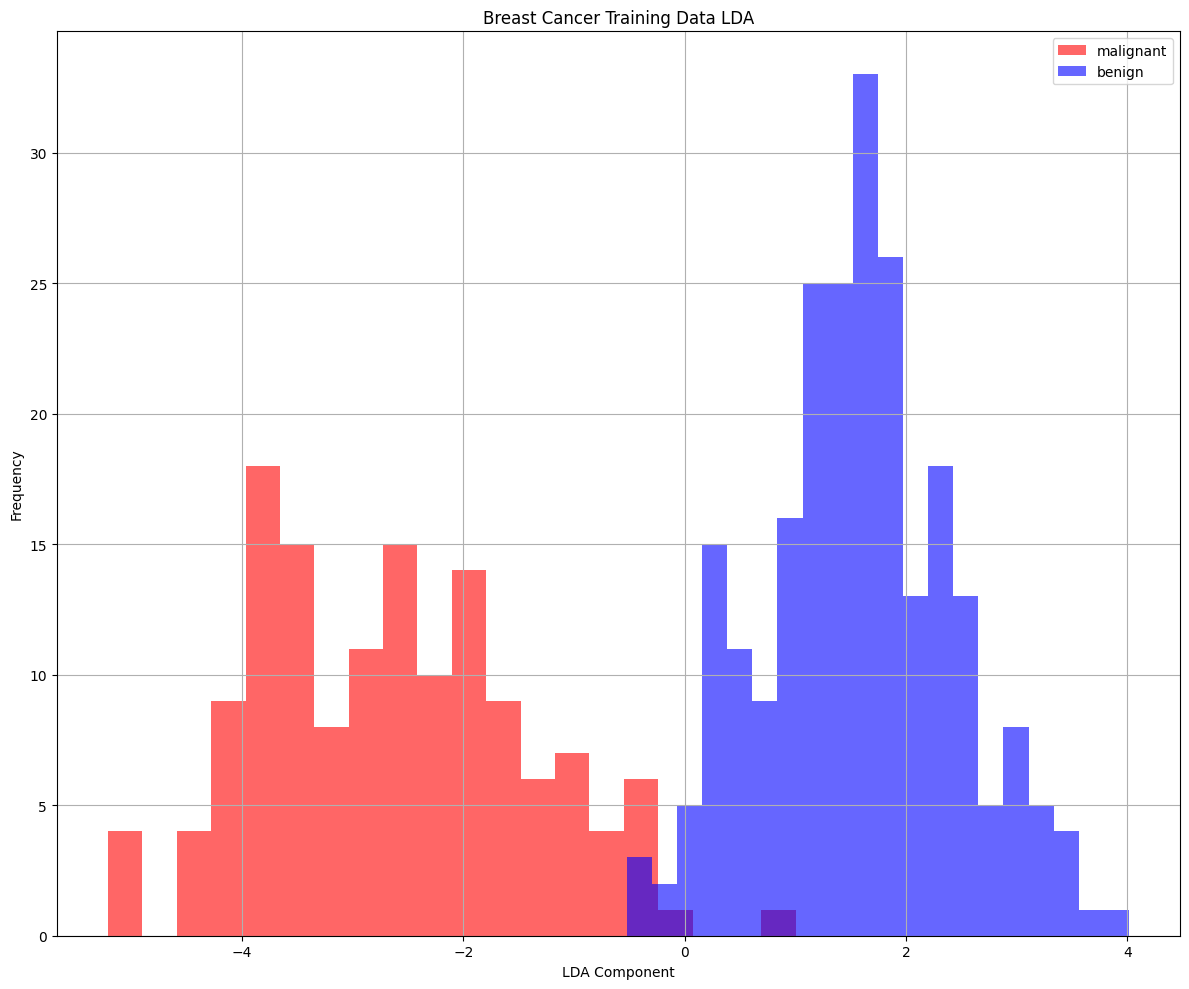

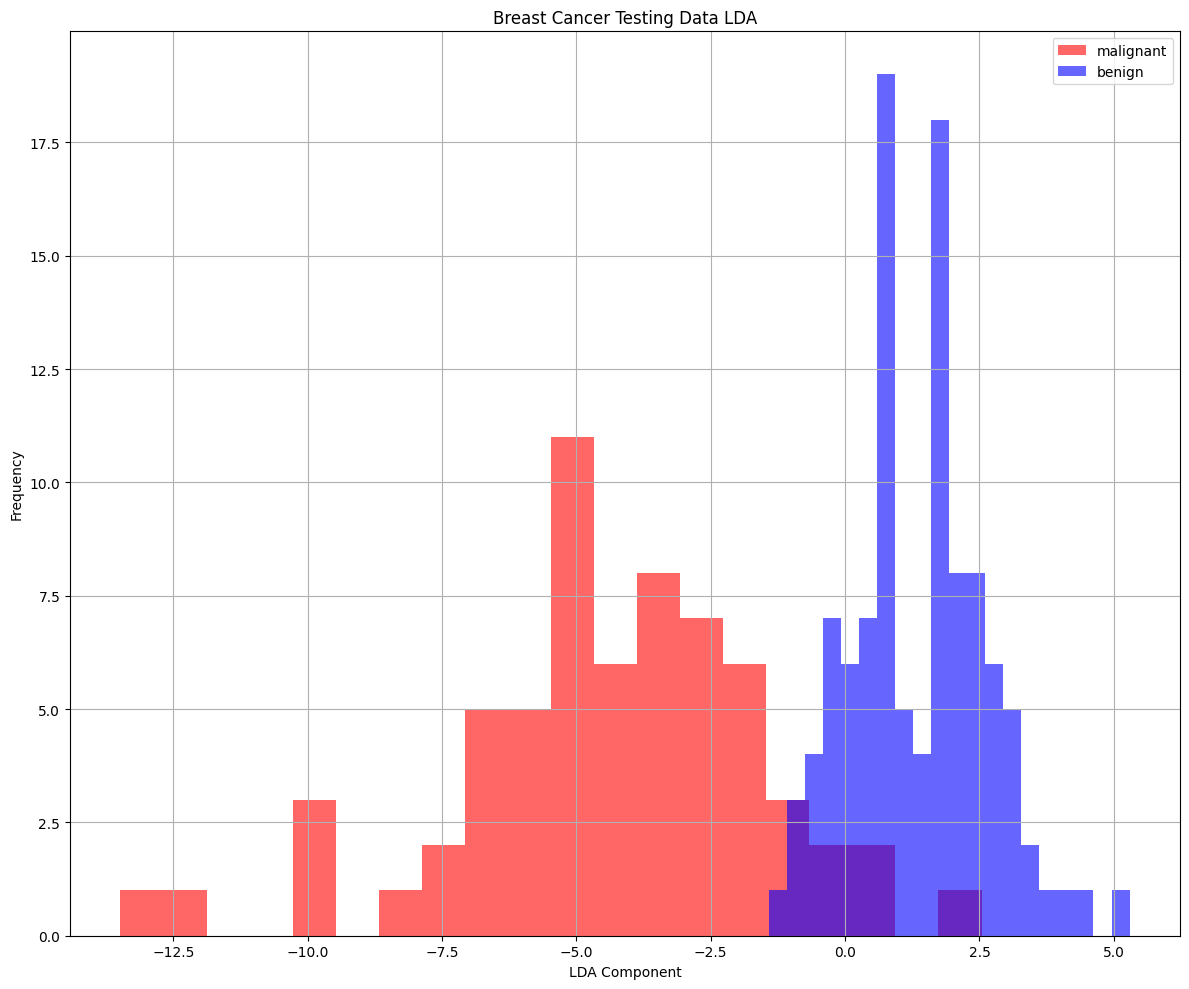

[I 2025-04-27 06:22:52,527] A new study created in memory with name: no-name-88a47178-1265-4738-8821-445de786b3c8
[I 2025-04-27 06:23:27,597] Trial 0 finished with value: 0.9789473684210528 and parameters: {'n_estimators': 6985, 'learning_rate': 0.003039390427885448, 'num_leaves': 87, 'max_depth': 6, 'min_child_samples': 71, 'subsample': 0.6132465234756944, 'colsample_bytree': 0.8669961388775258, 'reg_alpha': 0.00047279429742979066, 'reg_lambda': 1.2012985479858952e-07}. Best is trial 0 with value: 0.9789473684210528.
[I 2025-04-27 06:24:14,862] Trial 1 finished with value: 0.9763157894736842 and parameters: {'n_estimators': 1555, 'learning_rate': 0.03574311601639213, 'num_leaves': 89, 'max_depth': 10, 'min_child_samples': 5, 'subsample': 0.989617451380829, 'colsample_bytree': 0.8068462948301216, 'reg_alpha': 2.129117888352754e-07, 'reg_lambda': 5.229322309446921e-06}. Best is trial 0 with value: 0.9789473684210528.
[I 2025-04-27 06:24:29,820] Trial 2 finished with value: 0.97631578947

Best trial:
Accuracy: 0.9842105263157894
Best hyperparameters:  {'n_estimators': 4871, 'learning_rate': 0.04226790781108649, 'num_leaves': 75, 'max_depth': 11, 'min_child_samples': 53, 'subsample': 0.7329450800099397, 'colsample_bytree': 0.5697216265382599, 'reg_alpha': 4.0194245928468016e-08, 'reg_lambda': 2.0737888220142087}


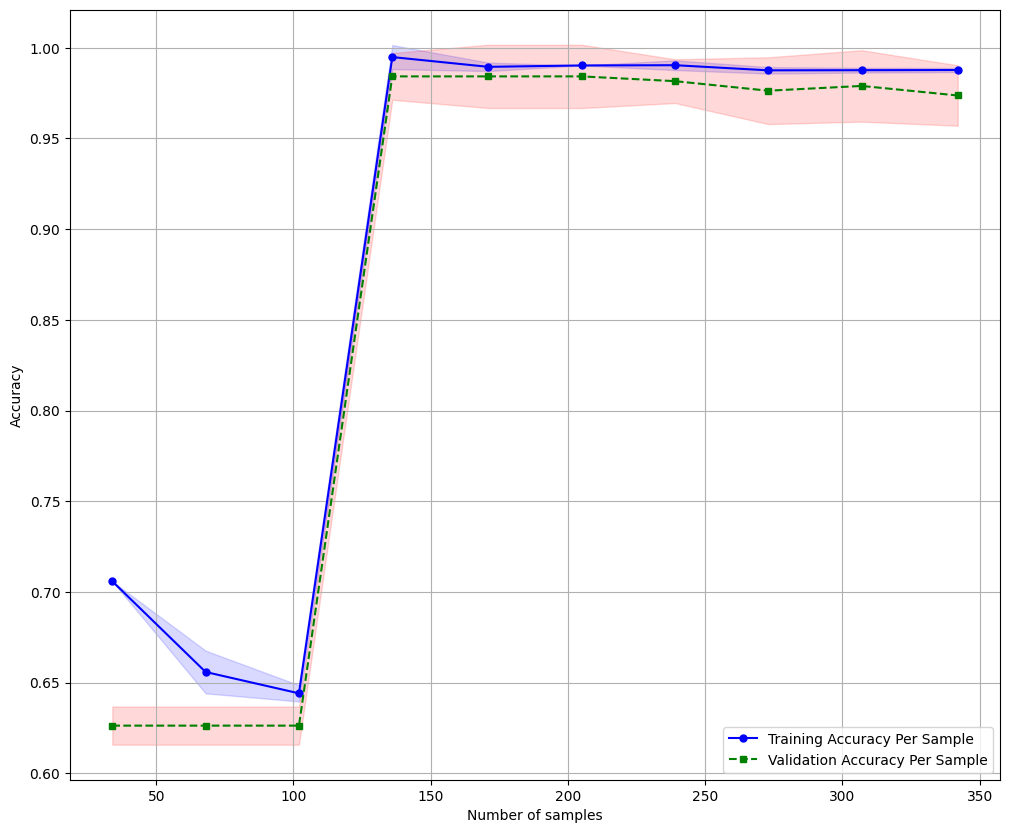

Confusion Matrix
[[60  4]
 [11 96]]
Accuracy: 0.9123, Precision: 0.9600, Recall: 0.8972, F1: 0.9275, AUC: 0.9452


In [2]:
outlier_params = {'n_neighbors': 20}
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'loc', outlier_params)

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'lda', {})

helper.train_and_evaluate_model('lgbm', X_train_feature_extracted, X_test_feature_extracted, df_train_outlier_removed.iloc[:,-1], y_test)